# Census API - New York

In [1]:
# import packages

from us import states
import pandas as pd
import requests

# import doc with API key

import config

from scripts import censusAPI as cen

from Data import censusIndex as cenInd

In [2]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', None)

In [3]:
cen.censusDataDetailedTable.head()

,name,label,concept
0,AIANHH,Geography,None
1,AIHHTL,Geography,None
2,AIRES,Geography,None
3,ANRC,Geography,None
4,B01001A_001E,Estimate!!Total:,SEX BY AGE (WHITE ALONE)


## NY School Districts will Serve as the Geography Type

#### This is the location data we will use for the Census API call

In [4]:
# Test with Nassau County School Districts

selectedNYCounties = cen.schoolDistrictCSV((r'Data\USCensusNYSchDist.csv'))

In [5]:
natlSchDist = ("https://www2.census.gov/geo/docs/reference/codes/files/st01_al_schdist.txt")
US = cen.schoolDistrictGEOID(natlSchDist)

In [6]:
# Test with Nassau County School Districts

NYURL = ("https://www2.census.gov/geo/docs/reference/codes/files/st36_ny_schdist.txt")
NY = cen.schoolDistrictGEOID(NYURL)
NY.head(1)

,State,ID,GEOID,School District Name,Class
0,NY,36,1,Dolgeville Central School District,Unified


In [7]:
# Test merging user input school district CSV with census GEOID list

NYCountiesGEOID = cen.mergedSchoolDist(NY, selectedNYCounties)
NYCountiesGEOID.head()

,State,ID,GEOID,School District Name,Class
0,NY,36,4740,Bethpage Union Free School District,Unified
1,NY,36,10050,East Williston Union Free School District,Unified
2,NY,36,11760,Garden City Union Free School District,Unified
3,NY,36,14280,Herricks Union Free School District,Unified
4,NY,36,15810,Jericho Union Free School District,Unified


In [8]:
# Test grab GEOIDs only

NYGEOID = (cen.GEOIDonly(NYCountiesGEOID))
NYGEOID

'4740,10050,11760,14280,15810,17160,17700,17910,18270,18630,19020,23220,23580,24780,25050,26370,28560,29850,31710'

## US Census Data

In [9]:
x=cen.houseType(25050,36)
x

,state,school district (unified),NAME,Total Occupied Housing Units,Owner Occupied,Renter Occupied
0,36,25050,"Roslyn Union Free School District, New York",18342,15694,2648


In [10]:
x=cen.householdSize('00060',32)
x

,state,school district (unified),NAME,Average Household Size,Owner Occupied,Render Occupied
0,32,00060,"Clark County School District, Nevada",2.76,2.82,2.68


In [11]:
x=cen.houseYrBlt(NYGEOID,36)
x.iloc[:, 3:,] = x.iloc[:, 3:,].apply(pd.to_numeric)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   state                      17 non-null     object
 1   school district (unified)  17 non-null     object
 2   NAME                       17 non-null     object
 3   Total Housing Units        17 non-null     int64 
 4   Built 2014 or Later        17 non-null     int64 
 5   Built 2010 to 2013         17 non-null     int64 
 6   Built 2000 to 2009         17 non-null     int64 
 7   Built 1990 to 1999         17 non-null     int64 
 8   Built 1980 to 1989         17 non-null     int64 
 9   Built 1970 to 1979         17 non-null     int64 
 10  Built 1960 to 1969         17 non-null     int64 
 11  Built 1950 to 1959         17 non-null     int64 
 12  Built 1940 to 1949         17 non-null     int64 
 13  Built 1939 or Earlier      17 non-null     int64 
dtypes: int64(11)

## Filtering DataFrames!

In [12]:
# Filter by integer value
# newDf = popDF.loc[(popDF['B01001A_001E']>40000)]
# newDf

## Matplot

In [13]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

In [14]:
allDistricts = x["NAME"].tolist()
totalPop = x['Built 2014 or Later'].tolist()

allDistrictsNew = (allDistricts[3:])
totalPopNew = (totalPop[3:])
print(totalPopNew)

[119, 38, 87, 109, 70, 27, 22, 20, 9, 112, 80, 59, 84, 123]


<ipython-input-15-06f23a3217bd>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=plt.subplot(1,1,1)


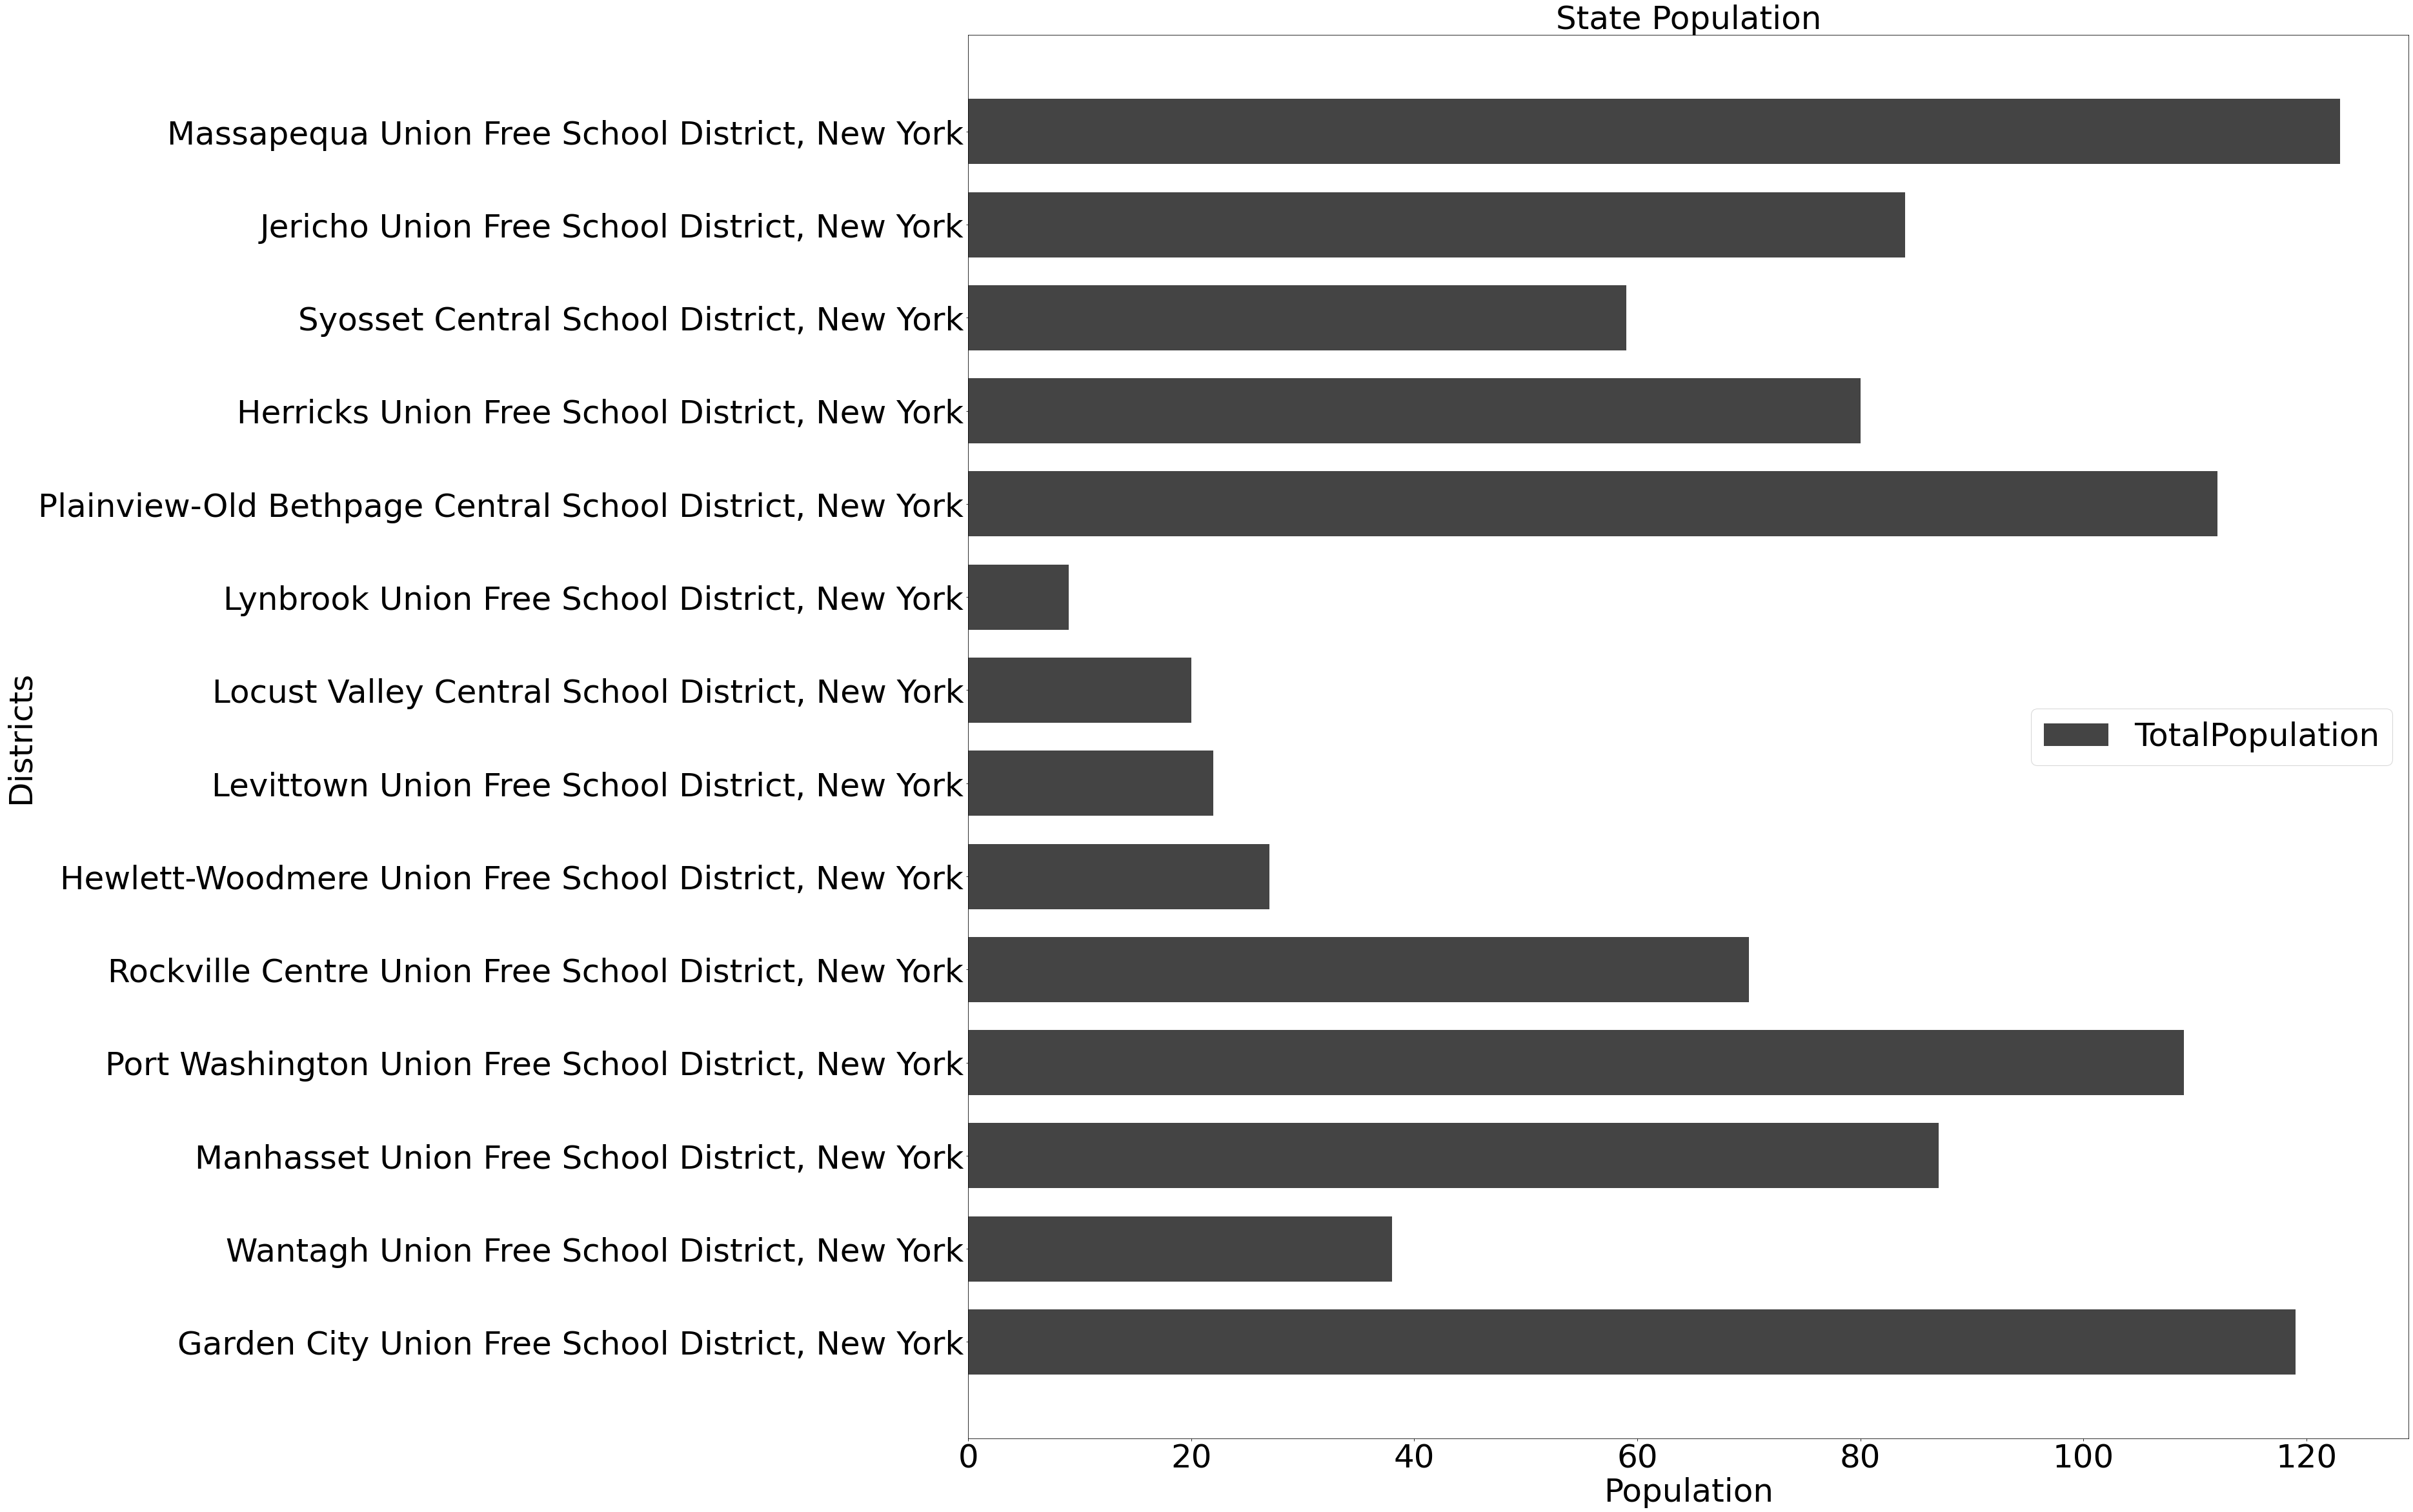

In [15]:
fig = plt.figure(figsize=(40,40))

plt.xticks(fontsize=50)
plt.yticks(fontsize=50)


plt.title('State Population',fontsize=50)
plt.ylabel('Districts',fontsize=50)
plt.xlabel('Population',fontsize=50)
ax1=plt.subplot(1,1,1)

ax1.barh(allDistrictsNew, totalPopNew, 0.7, color = "#444444",label="TotalPopulation")
#plt.xticks([0,10])

plt.legend(fontsize=50)
plt.show()